In [1]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans, MeanShift, DBSCAN
import matplotlib.pyplot as plt

def load_image(filename) :
    img = Image.open(filename)
    data = np.array( img, dtype='uint8' )
    return data

img = load_image('data/img2.jpg')

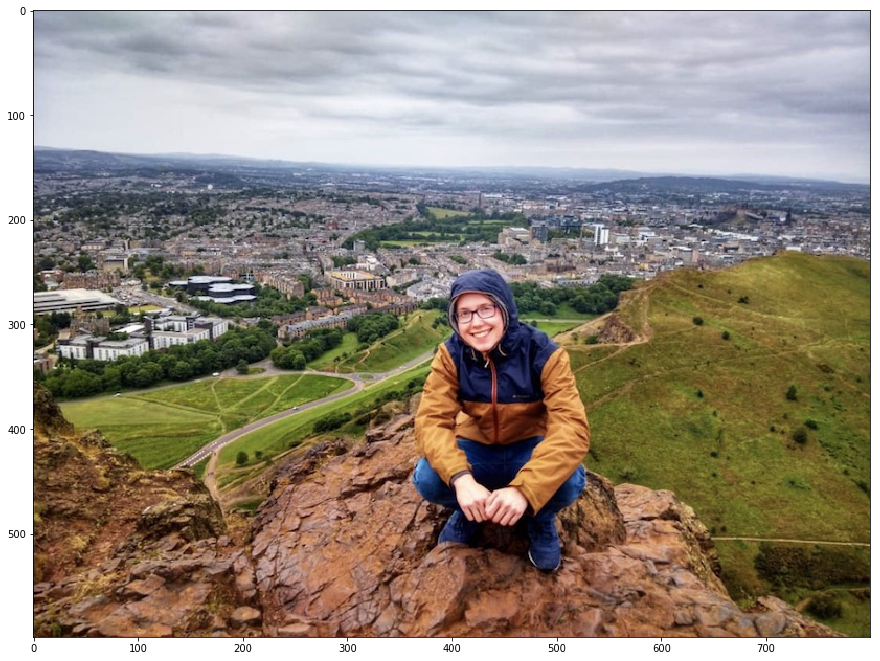

In [2]:
from matplotlib.pyplot import imshow, subplots
fig, ax = subplots(figsize=(15, 17))
ax.imshow(img, interpolation="nearest")  

In [3]:
pixel_array = img.reshape(img.shape[0]*img.shape[1],3)
pixel_array

array([[103, 109, 121],
       [162, 168, 180],
       [155, 161, 175],
       ...,
       [ 72,  70,  21],
       [ 69,  67,  16],
       [ 65,  63,  12]], dtype=uint8)

In [4]:
n=5

kmeans = KMeans(n_clusters=n).fit(pixel_array)

In [5]:
labels_img = kmeans.labels_.reshape(img.shape[0],img.shape[1])

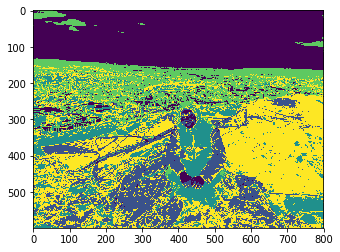

In [6]:
imshow(labels_img, interpolation="nearest")  

In [7]:
import statistics 

def get_avg_color(pixels, labels, label):
    r_sum = 0
    g_sum = 0
    b_sum = 0
    count = 0
    for ((r,g,b), l) in zip(pixels,labels):
        if l == label:
            r_sum += r
            g_sum += g
            b_sum += b
            count += 1

    return r_sum//count, g_sum//count, b_sum//count

def get_mean_color(pixels, labels, label):
    r_values = []
    g_values = []
    b_values = []
    count = 0
    for ((r,g,b), l) in zip(pixels,labels):
        if l == label:
            r_values.append(r)
            g_values.append(g)
            b_values.append(b)

    return int(statistics.median(r_values)), int(statistics.median(g_values)), int(statistics.median(b_values))

get_avg_color(pixel_array, kmeans.labels_, 0)
get_mean_color(pixel_array, kmeans.labels_,0)

(201, 203, 217)

In [8]:
def get_compressed(pixel_array, labels,n):
    avg_colors = []
    for i in range(0,n):
        avg_colors.append(get_avg_color(pixel_array, labels,i))
    return avg_colors

def get_compressed_mean(pixel_array, labels,n):
    avg_colors = []
    for i in range(0,n):
        avg_colors.append(get_mean_color(pixel_array, labels,i))
    return avg_colors

compressed_colors = get_compressed(pixel_array, kmeans.labels_, n)
print(compressed_colors)
print(kmeans.labels_)

[(201, 204, 215), (173, 132, 94), (48, 40, 30), (125, 128, 141), (107, 91, 51)]
[3 0 3 ... 2 2 2]


In [9]:
def compress_pixel_array(labels, compressed_colors):
    new_pixel_array = []
    for l in labels:
        new_pixel_array.append(compressed_colors[l])
    return new_pixel_array

compressed_array = np.array(compress_pixel_array(kmeans.labels_, compressed_colors))

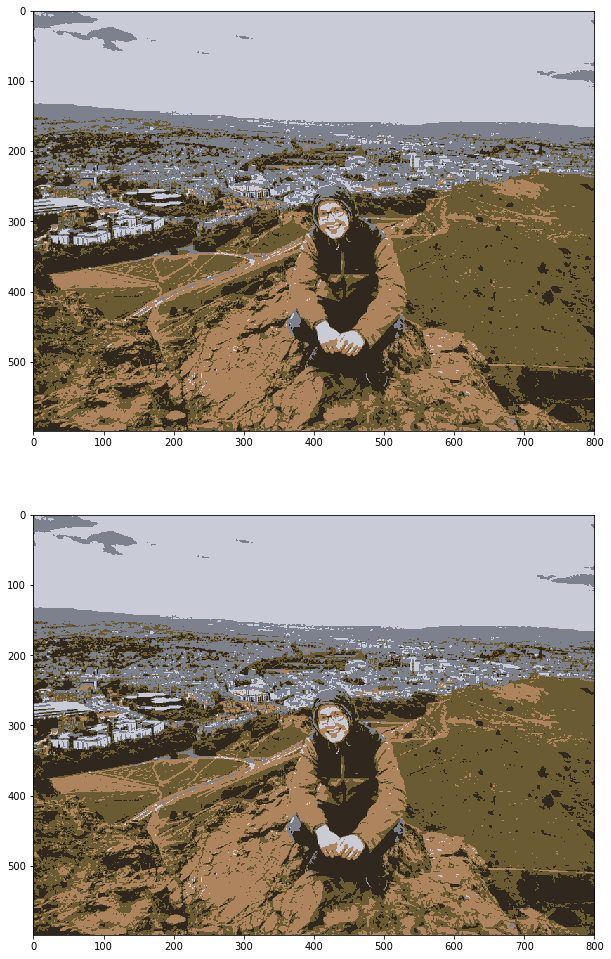

In [10]:
compressed_img = compressed_array.reshape(img.shape[0],img.shape[1],3)
fig, axarr = subplots(2, figsize=(15, 17))
axarr[0].imshow(compressed_img, interpolation="nearest")  
axarr[1].imshow(compressed_img, interpolation="nearest")  

In [11]:
def compress_image(color_count, img):
    pixel_array = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=color_count).fit(pixel_array)
    labels_img = kmeans.labels_.reshape(img.shape[0],img.shape[1])
    compressed_colors = get_compressed(pixel_array, kmeans.labels_, color_count)
    compressed_array = np.array(compress_pixel_array(kmeans.labels_, compressed_colors))
    compressed_img = compressed_array.reshape(img.shape[0],img.shape[1],3)
    return compressed_img

In [12]:
def compress_image_mean_color(color_count, img):
    pixel_array = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=color_count).fit(pixel_array)
    labels_img = kmeans.labels_.reshape(img.shape[0],img.shape[1])
    compressed_colors = get_compressed_mean(pixel_array, kmeans.labels_, color_count)
    compressed_array = np.array(compress_pixel_array(kmeans.labels_, compressed_colors))
    compressed_img = compressed_array.reshape(img.shape[0],img.shape[1],3)
    return compressed_img

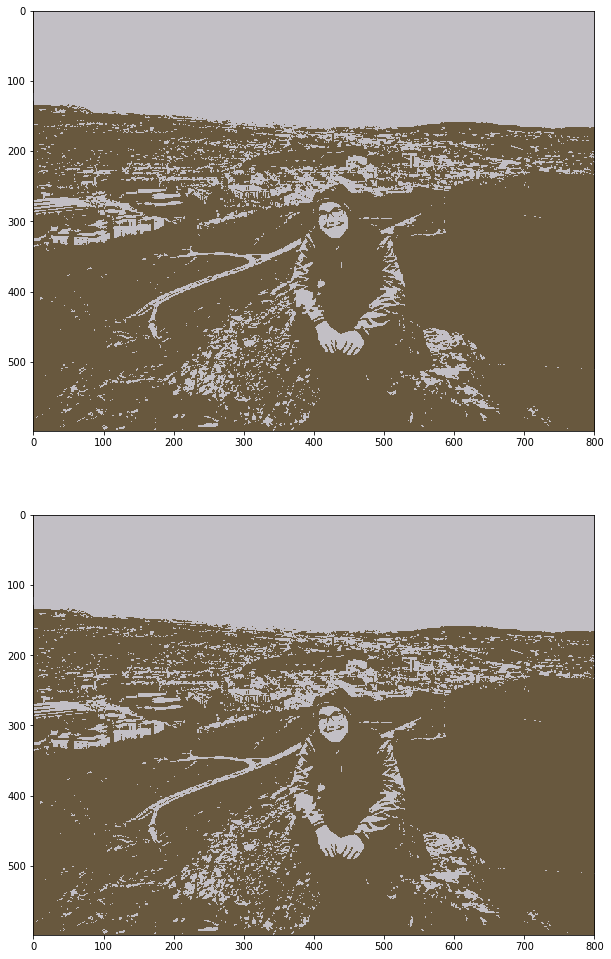

In [13]:
img2 = compress_image(2, img)
img2_mean = compress_image(2, img)
fig, axarr = subplots(2, figsize=(15, 17))
axarr[0].imshow(img2, interpolation="nearest")  
axarr[1].imshow(img2_mean, interpolation="nearest") 

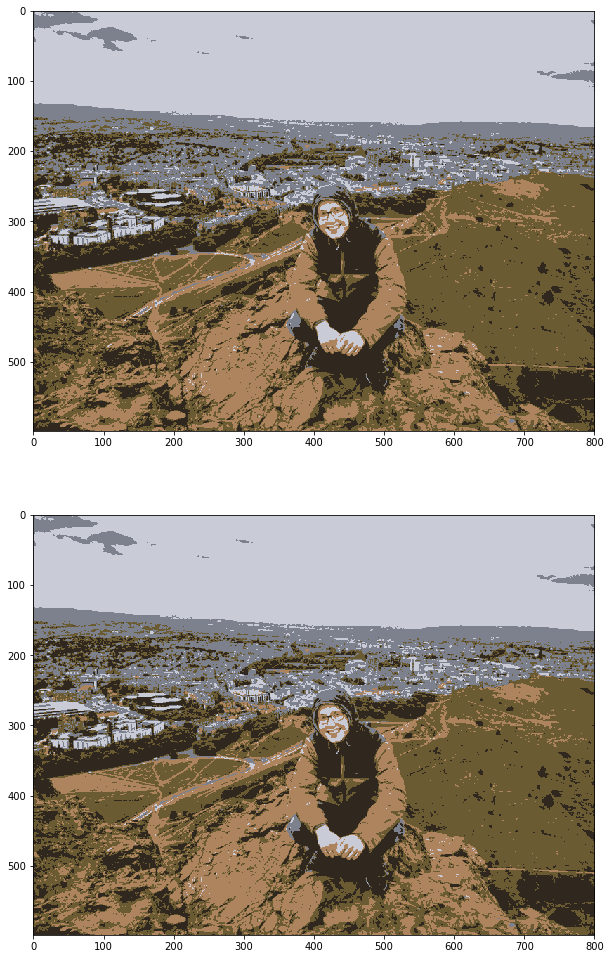

In [14]:
img5 = compress_image(5, img)
img5_mean = compress_image(5, img)
fig, axarr = subplots(2, figsize=(15, 17))
axarr[0].imshow(img5, interpolation="nearest")  
axarr[1].imshow(img5_mean, interpolation="nearest") 

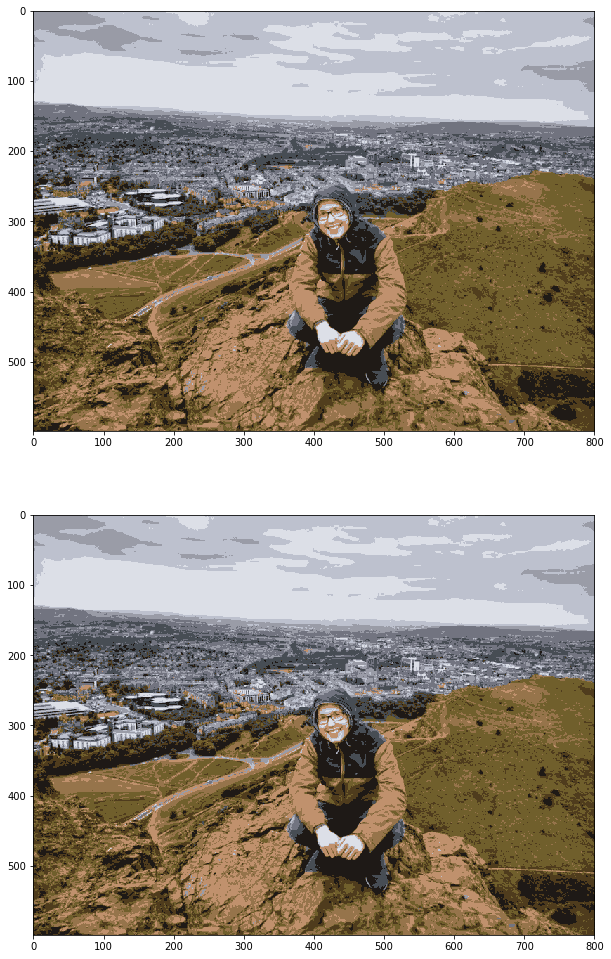

In [15]:
img10 = compress_image(10, img)
img10_mean = compress_image(10, img)
fig, axarr = subplots(2, figsize=(15, 17))
axarr[0].imshow(img10, interpolation="nearest")  
axarr[1].imshow(img10_mean, interpolation="nearest") 

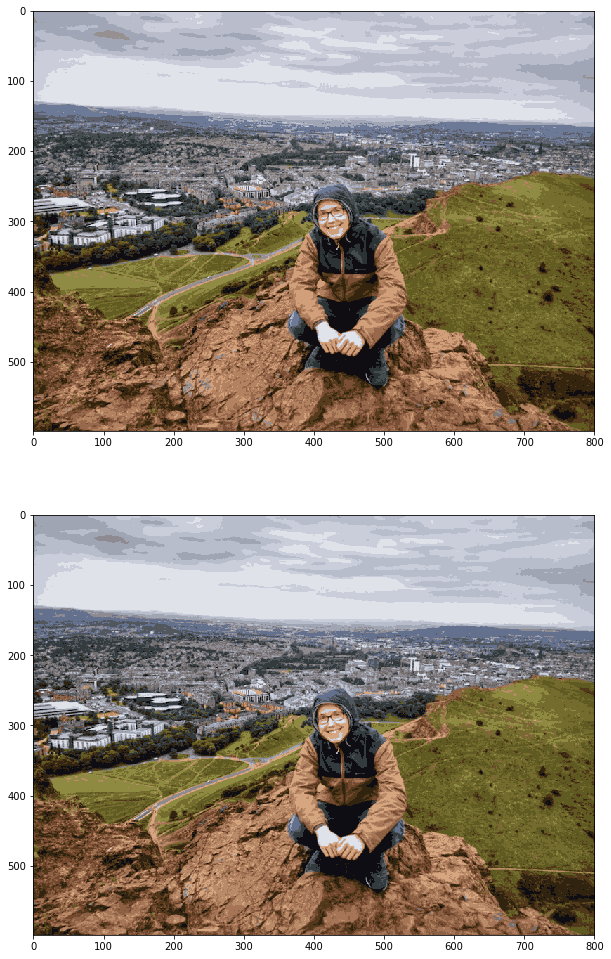

In [16]:
img20 = compress_image(20, img)
img20_mean = compress_image(20, img)
fig, axarr = subplots(2, figsize=(15, 17))
axarr[0].imshow(img20, interpolation="nearest")  
axarr[1].imshow(img20_mean, interpolation="nearest") 

In [19]:
def compress_image_mean_shift(img):
    pixel_array = img.reshape(img.shape[0]*img.shape[1],3)
    meanshift = MeanShift(bandwidth=20).fit(pixel_array)
    color_count = max(meanshift.labels_)+1
    print(color_count)
    compressed_colors = get_compressed(pixel_array, meanshift.labels_, color_count)
    compressed_array = np.array(compress_pixel_array(meanshift.labels_, compressed_colors))
    compressed_img = compressed_array.reshape(img.shape[0],img.shape[1],3)
    return compressed_img

In [20]:
def compress_image_db_scan(img):
    pixel_array = img.reshape(img.shape[0]*img.shape[1],3)
    meanshift = DBSCAN(eps=50, min_samples=30).fit(pixel_array)
    color_count = max(meanshift.labels_)+1
    print(color_count)
    compressed_colors = get_compressed(pixel_array, meanshift.labels_, color_count)
    compressed_array = np.array(compress_pixel_array(meanshift.labels_, compressed_colors))
    compressed_img = compressed_array.reshape(img.shape[0],img.shape[1],3)
    return compressed_img

In [21]:
# edvin = load_image('data/edvin.jpg')
# fig, ax = subplots(figsize=(12, 12))
# ax.imshow(edvin, interpolation="nearest")  
# compressed_edvin =  compress_image_mean_shift(edvin)

In [22]:
# fig, ax = subplots(figsize=(12, 12))
# imshow(compressed_edvin, interpolation="nearest")  

In [25]:
pixel_array = img.reshape(img.shape[0]*img.shape[1],3)
np.random.shuffle(pixel_array)

pixel_array = pixel_array[:20000]
img_r = [rgb[0] for rgb in pixel_array]
img_g = [rgb[1] for rgb in pixel_array]
img_b = [rgb[2] for rgb in pixel_array]

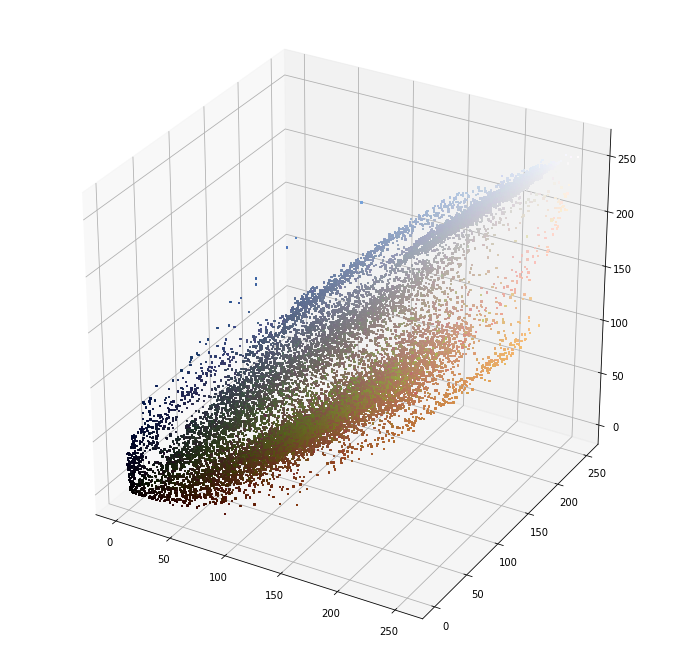

In [26]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')

ax.scatter(img_r, img_g, img_b, c = pixel_array/255.0, alpha=1,  marker='s', edgecolors='face', s=2)
# ax.view_init(10, 70)
plt.show()
